### Recruitment Data 

#### The following notebook will explore data wrangling with the use of recruitment personality scores data. Applicants are required to complete a personality survey and that data is used as input for this notebook. The five factors observed in the survey are Openness, Conscientiousness, Extraversion, Agreeableness and Neuroticsm or Emotional stability (OCEAN). These traits will form the subscale for the various data aplications and manipulations below. The structure of the notebook is as follows: 

### 1. Data Validation 
#### The data from the personality scores file is read in and checked for unique entries.

### 2. Subscale calculation 
#### A function is defined to take in and convert the answers from the personality survey to numbers. The total scores for each subscale are then calculated. 

### 3. Subscale interpretation 
#### A function is defined that takes in subscale totals as a parameter and returns a new dataframe with a new column that labels the subscale score as 'high', 'medium' or 'low', which we will henceforth refer to as the score category . 

### 4. Merge dataframes 
#### The department dataframe is merged with the personality score dataframe, retaining all applicants within the various departments. 

### 5. Data Visualization 
#### A histogram plotting the personality scores with the various departments is depicted. 

### 6. Dataframe Filtration
#### The merged dataframe is filtered for candidates that have a 'low' label on the Neuroticsm, Conscientiousness and Agreeableness traits. Such identified candidates, by department, are placed in a new column with the tag 'high risk'. 

### 7. Count Dataframe
#### A new dataframe is made with the count of the number of applicants in each score category within each subscale and department. 



### 1. Data Validation
#### The code below removes the duplicates and drops all null-valued columns. There are 1555 unique entries meaning 1555 applicants and 50 questions on the survey as represented by each column 

In [2]:
#Packages necessary to execute data manipulation and analysis are imported 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re

In [3]:
# The input data is read in, checked and duplicates are removed
scores = pd.read_csv('personality_scores.csv', sep = ';', header = 0)
scores.info()
pers_scores = scores.drop_duplicates(subset = 'ID', keep = 'first')
prsnl_scores = pers_scores.set_index('ID')
prsnl_scores.dropna(axis = 1, how = 'all', inplace = True)
print(prsnl_scores.shape)
prsnl_scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 70 columns):
ID                                                                          1555 non-null int64
Section 5 of 6 [I am always prepared.]                                      1555 non-null object
Section 5 of 6 [I am easily disturbed.]                                     1555 non-null object
Section 5 of 6 [I am exacting (demanding) in my work.]                      1555 non-null object
Section 5 of 6 [I am full of ideas.]                                        1555 non-null object
Section 5 of 6 [I am interested in people.]                                 1555 non-null object
Section 5 of 6 [I am not interested in abstract ideas.]                     1555 non-null object
Section 5 of 6 [I am not interested in other people's problems.]            1555 non-null object
Section 5 of 6 [I am not really interested in others.]                      1555 non-null object
Section 5 of 6 [I am 

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 5)","(4, 3)","(5, 5)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 1)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 5)","(5, 5)","(1, 3)","(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"


### 2. Subscale calculation 
#### A function is defined to take in and convert the answers from the personality survey to numbers and then the total scores for each subscale are calculated. 

In [4]:
# A function is defined that finds the numbers in a string and returns a list of dictionaries 
def subscale_totals (df_row):
    row_dict = {1:0, 2:0, 3:0, 4:0, 5:0}
    
    for string_pair in df_row:
        num_list = [int(s) for s in re.findall('\d+', str(string_pair))]  
# Sum values(answers) to their respective subscales in row dictionaries
        row_dict[num_list[0]] += num_list[1]
    
    return row_dict

In [119]:
# New dataframes are created; one empty and another the same shape as the original personality scores df with only the 
# values of that dataframe. The function above is passed to the latter. 
values_df = pd.DataFrame(prsnl_scores.values, index = prsnl_scores.index)
new_df = values_df.apply(subscale_totals, axis = 1)
subscale_df = pd.DataFrame()

# A for loop is used to populate the empty subscale dataframe by appending dictionaries to it.
for d in new_df: 
    subscale_df = subscale_df.append(d, ignore_index = True) 
subscale_df.columns = ['Extraversion','Agreeableness','Conscientiousness', 'Neuroticism','Openness']
subscale_df.head()

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,30.0,40.0,48.0,36.0,42.0
1,42.0,46.0,46.0,40.0,42.0
2,28.0,40.0,40.0,38.0,42.0
3,30.0,38.0,38.0,40.0,38.0
4,28.0,34.0,46.0,38.0,36.0


### 3. Subscale interpretation 
#### A function is defined that takes in subscale totals as a parameter and returns a new dataframe with a new column that labels the subscale score as 'high', 'medium' or 'low', which we will henceforth refer to as the score category . 

In [6]:
# The interpretation function is defined with subscale totals as a parameter
def generate_score_interpretation(total):

    for col in subscale_df.columns:
        high = subscale_df.loc[:, col].mean() + ((subscale_df.loc[:, col].std())/2)
        low = subscale_df.loc[:, col].mean() - ((subscale_df.loc[:, col].std())/2)
        
        if total >= high: 
            return 'high' 

        elif total < high and total > low: 
            return 'medium'
        
        else :
            return 'low'

In [7]:
# A headerless dataframe is created with the same shape and values as the subscale df. The function above is passed to 
# this dataframe to interpret the subscale totals. 
totals_df = pd.DataFrame(subscale_df.values, index = subscale_df.index)
sub_interp = totals_df.applymap(generate_score_interpretation)
sub_interp.columns = ['Extraversion_Interpretation','Agreeableness_Interpretation','Conscientiousness_Interpretation', 'Neuroticism_Interpretation','Openness_Interpretation']
sub_interp.head()

,Extraversion_Interpretation,Agreeableness_Interpretation,Conscientiousness_Interpretation,Neuroticism_Interpretation,Openness_Interpretation
0,medium,high,high,high,high
1,high,high,high,high,high
2,medium,high,high,high,high
3,medium,high,high,high,high
4,medium,medium,high,high,high


### 4. Merge dataframes 
#### The department dataframe is merged with the personality score dataframe, retaining all applicants within the various departments. 

In [28]:
# Department file is read in and concatenated with cleaned personality score data
dept_df = pd.read_csv('departments.csv', sep = ';', header = 0, index_col = 'ID')
dept_df.dropna(axis = 1, how = 'all', inplace = True)
score_merged_df = pd.concat([subscale_df, dept_df], axis=1)
score_merged_df['Department'] = score_merged_df['Department'].str.lower() 
print(score_merged_df['Department'].unique().tolist())
score_merged_df.head()

['data', 'web dev', 'copywriting', 'design', 'strategy']


,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Department
0,30.0,40.0,48.0,36.0,42.0,data
1,42.0,46.0,46.0,40.0,42.0,data
2,28.0,40.0,40.0,38.0,42.0,data
3,30.0,38.0,38.0,40.0,38.0,data
4,28.0,34.0,46.0,38.0,36.0,data


### 5. Data Visualization 
#### A histogram plotting the personality scores with the various departments is depicted. 



In [39]:
# A function is defined to plot a stacked histogram for every departments personality scores 
def stacked_histogram(dept, title, x_lab, y_lab):
    
# An array of the personality scores by traits is made for each department 
    O = list(score_merged_df[score_merged_df['Department'] == dept]['Openness'])
    C = list(score_merged_df[score_merged_df['Department'] == dept]['Conscientiousness'])
    E = list(score_merged_df[score_merged_df['Department'] == dept]['Extraversion'])
    A = list(score_merged_df[score_merged_df['Department'] == dept]['Agreeableness'])
    N = list(score_merged_df[score_merged_df['Department'] == dept]['Neuroticism'])

    personality_traits = [O, C, E, A, N]
    
# Assign colours and labels for each personality trait    
    colours = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
    labels = ['Openness', 'Conscientiousness', 'Extraversion','Agreeableness', 'Neuroticism']
    
# Plot the stacjed histogram for each department
    plt.hist(personality_traits, color = colours, stacked = True, label = labels)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)
    plt.legend()
    plt.show()

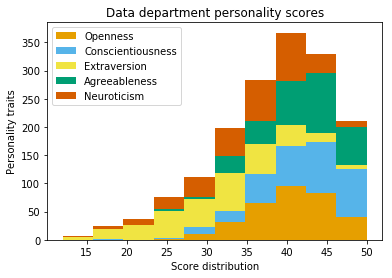

In [40]:
# Each department's parameters are defined in order to pass to the function defined above for plotting
dept_name = 'data'
x_label = 'Score distribution'
y_label = 'Personality traits'
chart_title = 'Data department personality scores'

# The above-defined function is now called 
stacked_histogram(dept_name, chart_title, x_label, y_label)

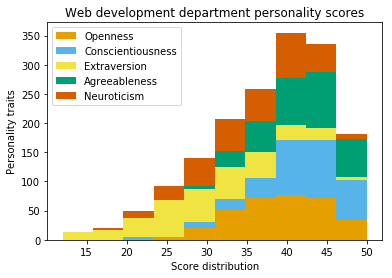

In [41]:
dept_name = 'web dev'
x_label = 'Score distribution'
y_label = 'Personality traits'
chart_title = 'Web development department personality scores'

# The above-defined function is now called 
stacked_histogram(dept_name, chart_title, x_label, y_label)

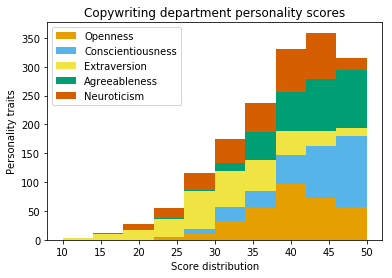

In [42]:
dept_name = 'copywriting'
x_label = 'Score distribution'
y_label = 'Personality traits'
chart_title = 'Copywriting department personality scores'

# The above-defined function is now called 
stacked_histogram(dept_name, chart_title, x_label, y_label)

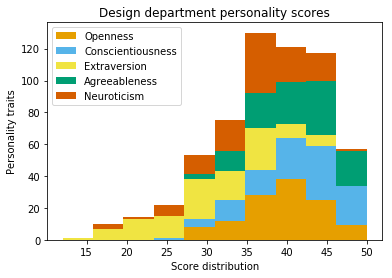

In [43]:
dept_name = 'design'
x_label = 'Score distribution'
y_label = 'Personality traits'
chart_title = 'Design department personality scores'

# The above-defined function is now called 
stacked_histogram(dept_name, chart_title, x_label, y_label)

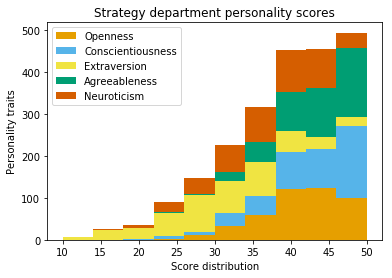

In [44]:
dept_name = 'strategy'
x_label = 'Score distribution'
y_label = 'Personality traits'
chart_title = 'Strategy department personality scores'

# The above-defined function is now called 
stacked_histogram(dept_name, chart_title, x_label, y_label)

### 6. Dataframe Filtration
#### The merged dataframe is filtered for candidates that have a 'low' label on the Neuroticsm, Conscientiousness and Agreeableness traits. Such identified candidates, by department, are placed in a new column with the tag 'high risk'. 

In [45]:
# Department file is read in and concatenated with  subscale interpretation dataframe
dept_df = pd.read_csv('departments.csv', sep = ';', header = 0, index_col = 'ID')
dept_df.dropna(axis = 1, how = 'all', inplace = True)
interp_merged_df = pd.concat([sub_interp, dept_df], axis=1)
interp_merged_df['Department'] = interp_merged_df['Department'].str.lower() 
interp_merged_df.head()

,Extraversion_Interpretation,Agreeableness_Interpretation,Conscientiousness_Interpretation,Neuroticism_Interpretation,Openness_Interpretation,Department
0,medium,high,high,high,high,data
1,high,high,high,high,high,data
2,medium,high,high,high,high,data
3,medium,high,high,high,high,data
4,medium,medium,high,high,high,data


In [130]:
# A function is defined to filter the merged subscale interpretation dataframe for applicants who scored 'low' on 
# Extraversion, Conscientiousness or Agreeableness. New dataframes are created for each trait with the low scoring 
# applicants ID numbers as well as a high risk tag in a new column
def high_risk_filter(filtered_df, low_df, trait_col):
    
    filtered_df = interp_merged_df.filter([trait_col,'Department'], axis=1)
    low_df = filtered_df[filtered_df[trait_col] == 'low']
    low_df.insert(2,'High Risk Applicants', 'high risk', allow_duplicates = False)
    return low_df.head()


In [131]:
# The function above takes in the various parameters below to create new high risk dataframes for each trait
filtered_df = e_df
low_df = e_low 
trait_col = 'Extraversion_Interpretation'

high_risk_filter(filtered_df, low_df, trait_col)

,Extraversion_Interpretation,Department,High Risk Applicants
11,low,data,high risk
14,low,data,high risk
18,low,data,high risk
19,low,data,high risk
25,low,data,high risk


In [132]:
filtered_df = a_df
low_df = a_low 
trait_col = 'Agreeableness_Interpretation'

high_risk_filter(filtered_df, low_df, trait_col)

,Agreeableness_Interpretation,Department,High Risk Applicants
25,low,data,high risk
85,low,web dev,high risk
546,low,strategy,high risk
716,low,strategy,high risk
801,low,strategy,high risk


In [133]:
filtered_df = c_df
low_df = c_low 
trait_col = 'Conscientiousness_Interpretation'

high_risk_filter(filtered_df, low_df, trait_col)

,Conscientiousness_Interpretation,Department,High Risk Applicants
34,low,web dev,high risk
129,low,web dev,high risk
132,low,web dev,high risk
286,low,design,high risk
405,low,strategy,high risk


### 7. Count Dataframe
#### A new dataframe is made with the count of the number of applicants in each score category within each subscale and department. 



In [212]:
# A new dataframe is created to house the number of low risk applicants by departments and personality traits
low_risk_df = pd.DataFrame()

In [219]:
# A dataframe is created for every department 
dept_list = ['data', 'web dev', 'strategy', 'design', 'copywriting']
for d in dept_list:
    dept_df = interp_merged_df[interp_merged_df['Department'] == d].drop(labels = 'Department', axis = 1)
    
# A list comprehension is used to sum the highs and mediums of each personality trait by department 
    trait_list = list(dept_df.columns)
    trait_sums = [(dept_df[i] == 'high').sum() + (dept_df[i] == 'medium').sum() for i in trait_list]
    
# The trait list is set as the index for the dataframe that is now populated low risk totals for each personality trait
# by department.
    low_risk_df[d] = trait_sums
    low_risk_df.index = trait_list
    low_risk_df.index.names = ['subscale']
    
low_risk_df.head()

,data,web dev,strategy,design,copywriting
subscale,,,,,
Extraversion_Interpretation,232,204,302,85,232
Agreeableness_Interpretation,326,330,446,120,325
Conscientiousness_Interpretation,326,327,435,119,320
Neuroticism_Interpretation,289,292,400,109,280
Openness_Interpretation,327,325,445,120,321
